In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("merc.xlsx")

In [3]:
dataFrame.head()

year  price transmission  mileage  tax   mpg  engineSize
0  2005   5200    Automatic    63000  325  32.1         1.8
1  2017  34948    Automatic    27000   20  61.4         2.1
2  2016  49948    Automatic     6200  555  28.0         5.5
3  2016  61948    Automatic    16000  325  30.4         4.0
4  2016  73948    Automatic     4000  325  30.1         4.0

6 ozelligimiz var bunlarla simdi analiz ve model olusturma zamani:

Veriyi anlamak:(bu paralar pound)
count:veris sayisini gosterir
mean:ortalama
std:standart sapma
min:minimum deger
25%:
50%:yuzdelik kisimlari
75%:
max:maximum deger

In [4]:
dataFrame.describe()

year          price        mileage           tax           mpg  \
count  13119.000000   13119.000000   13119.000000  13119.000000  13119.000000   
mean    2017.296288   24698.596920   21949.559037    129.972178     55.155843   
std        2.224709   11842.675542   21176.512267     65.260286     15.220082   
min     1970.000000     650.000000       1.000000      0.000000      1.100000   
25%     2016.000000   17450.000000    6097.500000    125.000000     45.600000   
50%     2018.000000   22480.000000   15189.000000    145.000000     56.500000   
75%     2019.000000   28980.000000   31779.500000    145.000000     64.200000   
max     2020.000000  159999.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  13119.000000  
mean       2.071530  
std        0.572426  
min        0.000000  
25%        1.800000  
50%        2.000000  
75%        2.100000  
max        6.200000

null bir veri varsa ya sil ya da doldur ortalama bir rakamla

In [5]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

grafiksel analiz:
dagilim grafigi:histplot (fiyata gore baktik)

<Axes: xlabel='price', ylabel='Count'>

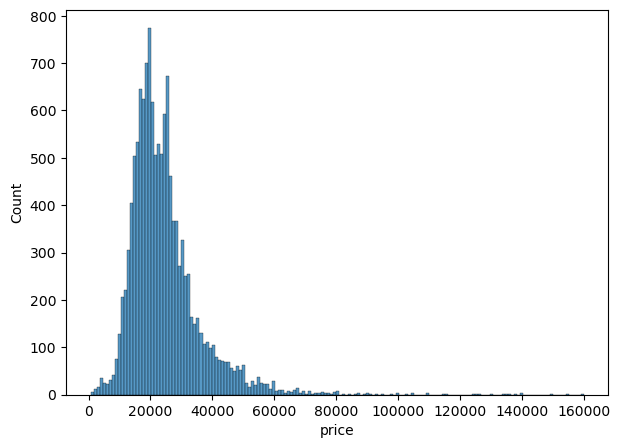

In [7]:
plt.figure(figsize=(7,5))
sbn.histplot(dataFrame["price"])

bu grafikten anlayacagimiz outlier degerlerin oldugu yani en pahali arabalar veri setimizde sikinti yaratacak gibi duruyor.
iki secenegin var:
1. ya bu verileri silip dataFrame'le calismaya devam edersin
2. ya da bu verilerle de calisip cikan sonucu gorursun 
gercek projelerde her ikisinin de yapilip hangisi daha iyi sonuc elde ediyorsa onu kullanmak daha mantikli

<Axes: xlabel='year', ylabel='count'>

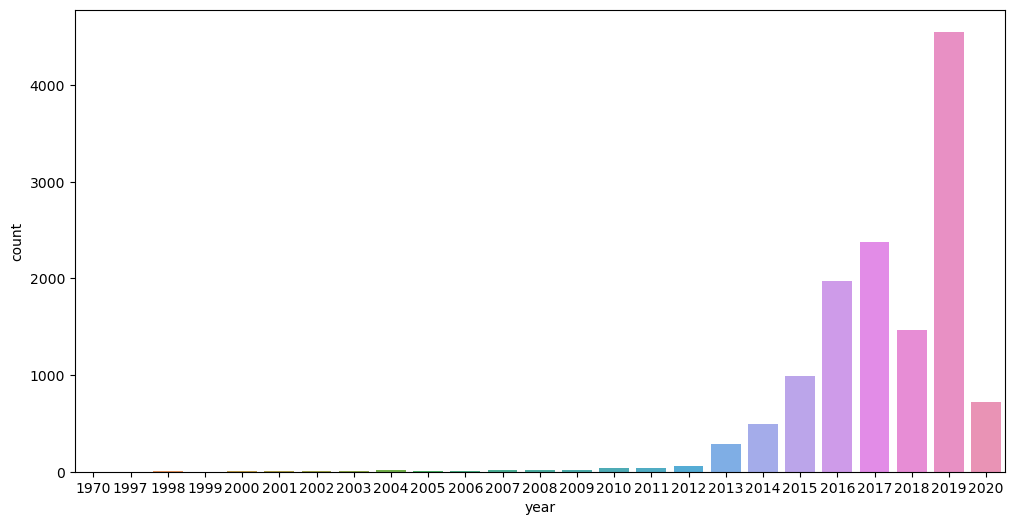

In [13]:
plt.figure(figsize=(12, 6))
sbn.countplot(x="year",data=dataFrame)
#yillara gore ne kadar veri var bakman mantikli

Verilerin birbiri arasindaki korelasyona bak:
numeric only=True olmali cunku gelecekte numerik olmayan veriler icin bir hataya yol acacaktir.

In [16]:
dataFrame.corr(numeric_only=True)

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.520712 -0.738027  0.012480 -0.094626   -0.142147
price       0.520712  1.000000 -0.537214  0.268717 -0.438445    0.516126
mileage    -0.738027 -0.537214  1.000000 -0.160223  0.202850    0.063652
tax         0.012480  0.268717 -0.160223  1.000000 -0.513742    0.338341
mpg        -0.094626 -0.438445  0.202850 -0.513742  1.000000   -0.339862
engineSize -0.142147  0.516126  0.063652  0.338341 -0.339862    1.000000

Bizi ilgilendiren price kolonu: 
Fiyatin neye gore degistigini ve diger ozelliklerin fiyati nasil etkiledigini analiz etmeye calisiyoruz.Bizi ilgilendiren fiyat oldugu icin fiyat ile diger verilerin korelasyonuna baksan daha iyi

In [18]:
dataFrame.corr(numeric_only=True)["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

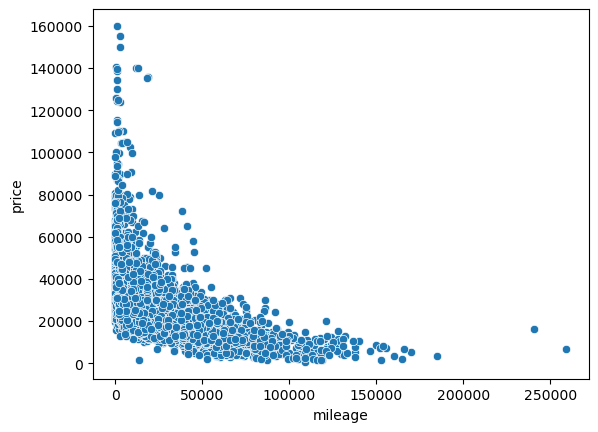

In [19]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)

In [20]:
dataFrame.sort_values("price",ascending = False).head(20)

year   price transmission  mileage  tax   mpg  engineSize
6199   2020  159999    Semi-Auto     1350  145  21.4         4.0
10044  2020  154998    Automatic     3000  150  21.4         4.0
5      2011  149948    Automatic     3000  570  21.4         6.2
8737   2019  140319    Semi-Auto      785  150  22.1         4.0
6386   2018  139995    Semi-Auto    13046  145  21.4         4.0
8      2019  139948    Automatic    12000  145  21.4         4.0
9133   2019  139559    Semi-Auto     1000  145  22.1         4.0
8821   2020  138439    Semi-Auto     1000  145  22.1         4.0
5902   2018  135771    Semi-Auto    19000  145  21.4         4.0
7864   2018  135124    Semi-Auto    18234  150  21.4         4.0
8673   2019  134219    Semi-Auto     1000  145  24.8         4.0
6210   2019  129990    Automatic     1000  145  24.8         4.0
4759   2019  126000    Automatic      250  145  24.6         4.0
2647   2019  125796    Automatic      637  145  24.8         4.0
6223   2019  124999    Automatic     1500  145  31.7         4.0
4094   2019  124366    Semi-Auto      880  145  24.8         4.0
2629   2019  123846    Semi-Auto     2951  145  22.1         4.0
7134   2019  115359    Semi-Auto     1000  145  30.1         4.0
9159   2019  114199    Semi-Auto      891  145  22.6         4.0
1980   2019  109995    Semi-Auto     4688  150  31.7         4.0

ascending=false en yuksek fiyatlari getirir.
true oldugunda da bu sefer azalandan artan fiyata

In [21]:
dataFrame.sort_values("price",ascending = True).head(20)

year  price transmission  mileage  tax   mpg  engineSize
11816  2003    650       Manual   109090  235  40.0         1.4
12008  2010   1350       Manual   116126  145  54.3         2.0
11765  2000   1490    Automatic    87000  265  27.2         3.2
11549  2002   1495    Automatic    13800  305  39.8         2.7
12594  2004   1495       Manual   119000  300  34.5         1.8
11174  2001   1695    Automatic   108800  325  31.7         3.2
12710  2006   1695    Automatic   153000  300  33.6         1.8
12766  2004   1780    Automatic   118000  265  41.5         2.2
12009  2007   1800    Automatic    84000  200  42.8         1.5
11764  1998   1990    Automatic    99300  265  32.1         2.3
11808  1998   1990    Automatic   113557  265  32.1         2.3
11383  2005   1995    Automatic   105000  260  43.5         2.1
11378  2004   1995    Semi-Auto   165000  330  20.0         3.7
11857  2002   2140    Automatic    52700  325  31.4         2.0
11906  2007   2478    Automatic    81000  160  49.6         2.0
11795  2005   2490    Automatic   101980  200  47.9         2.0
12765  2004   2495    Automatic   104000  325  31.7         1.8
11943  2005   2690    Automatic   109000  325  32.1         1.8
11263  2007   2795       Manual    79485  200  45.6         1.5
49     2006   2880    Automatic    66000  160  52.3         2.0

In [22]:
len(dataFrame)

13119

In [23]:
len(dataFrame) * 0.01 

131.19

VERI TEMIZLIGI:


In [24]:
yuzdeDoksanDokuzDf = dataFrame.sort_values("price",ascending = False).iloc[131:]
#indexe gore yerini bul en pahali araclarin 131'den sonraki degerden baslar veri seti dondurur.Bunu yuzdeDoksanDokuz'a 
#esitlersen bu senin yeni dataframe'in olur yani yuksek fiyatlardan temizlemis oldun veri setini

In [25]:
yuzdeDoksanDokuzDf.describe()
#artik islemlere bu veri seti uzerinden devam et

year         price        mileage           tax           mpg  \
count  12988.000000  12988.000000   12988.000000  12988.000000  12988.000000   
mean    2017.281876  24074.926933   22132.741146    129.689714     55.437142   
std        2.228515   9866.224575   21196.776401     65.183076     15.025999   
min     1970.000000    650.000000       1.000000      0.000000      1.100000   
25%     2016.000000  17357.500000    6322.000000    125.000000     45.600000   
50%     2018.000000  22299.000000   15369.500000    145.000000     56.500000   
75%     2019.000000  28706.000000   31982.250000    145.000000     64.200000   
max     2020.000000  65990.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  12988.000000  
mean       2.050901  
std        0.532596  
min        0.000000  
25%        1.675000  
50%        2.000000  
75%        2.100000  
max        6.200000

<Figure size 700x500 with 0 Axes>

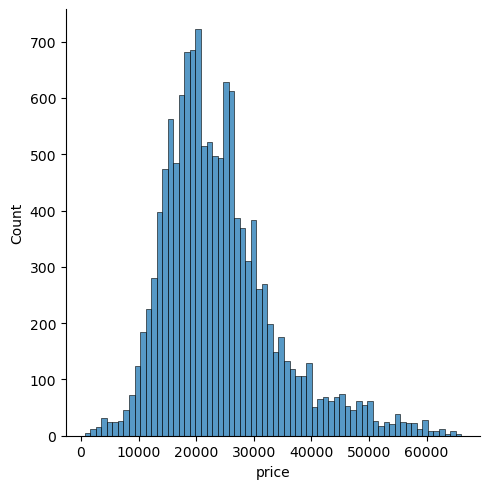

In [29]:
plt.figure(figsize=(7,5))
sbn.displot(yuzdeDoksanDokuzDf["price"])

daha normal bir dagilima sahip bir veri seti elde ettin

In [30]:
dataFrame.describe()
#orijinal dataFramemiz

year          price        mileage           tax           mpg  \
count  13119.000000   13119.000000   13119.000000  13119.000000  13119.000000   
mean    2017.296288   24698.596920   21949.559037    129.972178     55.155843   
std        2.224709   11842.675542   21176.512267     65.260286     15.220082   
min     1970.000000     650.000000       1.000000      0.000000      1.100000   
25%     2016.000000   17450.000000    6097.500000    125.000000     45.600000   
50%     2018.000000   22480.000000   15189.000000    145.000000     56.500000   
75%     2019.000000   28980.000000   31779.500000    145.000000     64.200000   
max     2020.000000  159999.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  13119.000000  
mean       2.071530  
std        0.572426  
min        0.000000  
25%        1.800000  
50%        2.000000  
75%        2.100000  
max        6.200000

In [32]:
dataFrame.groupby("year").mean(numeric_only=True)["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [33]:
yuzdeDoksanDokuzDf.groupby("year").mean(numeric_only=True)["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

1970 teki araclarin guncel yillarda satilan araclardan daha pahaliya satilmasi anlamsiz o zaman burda aykiri veriler soz konusudur.Bunun icin bunlari silebilirsin.

In [35]:
dataFrame[dataFrame.year != 1970].groupby("year").mean(numeric_only=True)["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [36]:
dataFrame = yuzdeDoksanDokuzDf

In [37]:
dataFrame.describe()

year         price        mileage           tax           mpg  \
count  12988.000000  12988.000000   12988.000000  12988.000000  12988.000000   
mean    2017.281876  24074.926933   22132.741146    129.689714     55.437142   
std        2.228515   9866.224575   21196.776401     65.183076     15.025999   
min     1970.000000    650.000000       1.000000      0.000000      1.100000   
25%     2016.000000  17357.500000    6322.000000    125.000000     45.600000   
50%     2018.000000  22299.000000   15369.500000    145.000000     56.500000   
75%     2019.000000  28706.000000   31982.250000    145.000000     64.200000   
max     2020.000000  65990.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  12988.000000  
mean       2.050901  
std        0.532596  
min        0.000000  
25%        1.675000  
50%        2.000000  
75%        2.100000  
max        6.200000

In [38]:
dataFrame = dataFrame[dataFrame.year != 1970]
#190 yillarini atar

In [39]:
dataFrame.groupby("year").mean(numeric_only=True)["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [40]:
dataFrame.head()

year  price transmission  mileage  tax   mpg  engineSize
6177  2019  65990    Semi-Auto     5076  150  30.4         3.0
5779  2020  65990    Semi-Auto      999  145  28.0         4.0
3191  2020  65980    Semi-Auto     3999  145  28.0         4.0
4727  2019  65000    Semi-Auto     3398  145  27.2         4.0
8814  2019  64999    Semi-Auto      119  145  40.9         3.0

burda gereksiz bir transmission kolonu var.Bu sekilde regresyona sokarsan numeric bir deger olmadigi icin hata verir.Bu kolonu da sil

In [42]:
dataFrame = dataFrame.drop("transmission",axis=1)

Model olusturma:
y ulasmak istenilen sey => fiyat
x geri kalan oznitelikler

In [43]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values

In [44]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [45]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [48]:
len(x_train)

9090

In [49]:
len(x_test)

3897

In [50]:
from sklearn.preprocessing import MinMaxScaler

bu siniftan obje olusturma

In [51]:
scaler = MinMaxScaler()

In [52]:
x_train = scaler.fit_transform(x_train)

In [53]:
x_test = scaler.transform(x_test)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
x_train.shape

(9090, 5)

5 tane ozelligimiz var. Katmanlarimiz 5 ya da 5 ten daha fazla olmasi mantikli

In [56]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")
#derin agimizi adam sectik. 

In [57]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 6ms/step - loss: 672147200.0000 - val_loss: 688108416.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 672135360.0000 - val_loss: 688088768.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 672097024.0000 - val_loss: 688015872.0000
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 671954112.0000 - val_loss: 687743424.0000
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 671413504.0000 - val_loss: 686761984.0000
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 669734848.0000 - val_loss: 684046784.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 665563392.0000 - val_loss: 677736960.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 656541952.0000 - val_loss: 664908032.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 6393857

37/37 [==============================] - 0s 2ms/step - loss: 24619440.0000 - val_loss: 25722598.0000
Epoch 144/300
37/37 [==============================] - 0s 3ms/step - loss: 24520456.0000 - val_loss: 25547170.0000
Epoch 145/300
37/37 [==============================] - 0s 3ms/step - loss: 24383356.0000 - val_loss: 25415746.0000
Epoch 146/300
37/37 [==============================] - 0s 2ms/step - loss: 24253320.0000 - val_loss: 25305242.0000
Epoch 147/300
37/37 [==============================] - 0s 2ms/step - loss: 24162478.0000 - val_loss: 25191188.0000
Epoch 148/300
37/37 [==============================] - 0s 3ms/step - loss: 24037756.0000 - val_loss: 25080228.0000
Epoch 149/300
37/37 [==============================] - 0s 3ms/step - loss: 23921520.0000 - val_loss: 24968394.0000
Epoch 150/300
37/37 [==============================] - 0s 3ms/step - loss: 23826414.0000 - val_loss: 24885362.0000
Epoch 151/300
37/37 [==============================] - 0s 2ms/step - loss: 23761152.0000 - val

37/37 [==============================] - 0s 3ms/step - loss: 19291238.0000 - val_loss: 20830190.0000
Epoch 286/300
37/37 [==============================] - 0s 2ms/step - loss: 19279588.0000 - val_loss: 20827158.0000
Epoch 287/300
37/37 [==============================] - 0s 2ms/step - loss: 19278394.0000 - val_loss: 20818520.0000
Epoch 288/300
37/37 [==============================] - 0s 2ms/step - loss: 19283156.0000 - val_loss: 20811444.0000
Epoch 289/300
37/37 [==============================] - 0s 3ms/step - loss: 19286794.0000 - val_loss: 20785742.0000
Epoch 290/300
37/37 [==============================] - 0s 3ms/step - loss: 19247710.0000 - val_loss: 20795208.0000
Epoch 291/300
37/37 [==============================] - 0s 2ms/step - loss: 19236848.0000 - val_loss: 20798524.0000
Epoch 292/300
37/37 [==============================] - 0s 2ms/step - loss: 19265816.0000 - val_loss: 20805798.0000
Epoch 293/300
37/37 [==============================] - 0s 2ms/step - loss: 19243478.0000 - val

validation_data=>dogrulama kayitlari icin kontrol

In [58]:
kayipVerisi = pd.DataFrame(model.history.history)

In [59]:
kayipVerisi.head()

loss     val_loss
0  672147200.0  688108416.0
1  672135360.0  688088768.0
2  672097024.0  688015872.0
3  671954112.0  687743424.0
4  671413504.0  686761984.0

<Axes: >

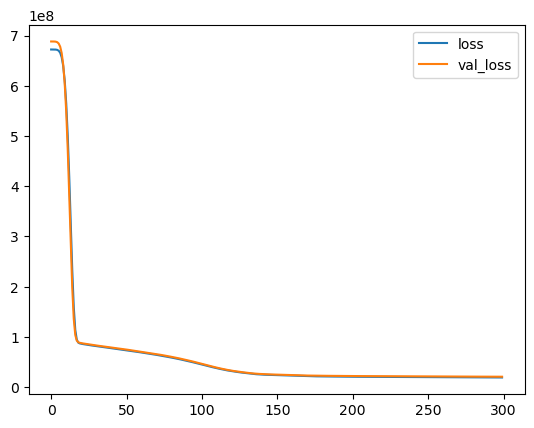

In [60]:
kayipVerisi.plot()

kayip ve kayip dogrulama kaydi birlikte hareket ediyor mu ediyor. Bu güzel bir basari elde ettigini gosterir.Eger loss ve val_loss arasi cok ayrilirsa yukari asagi gibi bu overfitting yani ezbere girmis olabilecegi anlamina geliyor olabilir.

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
tahminDizisi = model.predict(x_test)

122/122 [==============================] - 0s 696us/step


In [63]:
tahminDizisi

array([[22650.992],
       [23530.352],
       [24613.56 ],
       ...,
       [25729.86 ],
       [12118.584],
       [24321.736]], dtype=float32)

bunlarin dogru karsiligi ytest icinde 

In [64]:
mean_absolute_error(y_test,tahminDizisi)

3219.6815831647154

tahminler arasinda 3219 pound fark var

In [65]:
dataFrame.describe()

year         price        mileage           tax           mpg  \
count  12987.000000  12987.000000   12987.000000  12987.000000  12987.000000   
mean    2017.285516  24074.855779   22133.367367    129.676215     55.438392   
std        2.189633   9866.601115   21197.472376     65.167429     15.025902   
min     1997.000000    650.000000       1.000000      0.000000      1.100000   
25%     2016.000000  17355.000000    6320.000000    125.000000     45.600000   
50%     2018.000000  22299.000000   15371.000000    145.000000     56.500000   
75%     2019.000000  28706.000000   31986.500000    145.000000     64.200000   
max     2020.000000  65990.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  12987.000000  
mean       2.051059  
std        0.532313  
min        0.000000  
25%        1.700000  
50%        2.000000  
75%        2.100000  
max        6.200000

ortalama fiyatimiz 24.000 pound bu fiyattan 3200 pound sapabilirsin %13 luk fark var.Bu kabul edilebilir mi analiz icin kabul edilemez mi model ihtiyacina gore degerlendirirsin.Eger kabul edilemezse git ve tekrar verilen degerleri falan filan degistir. Tekrar eğit modeli

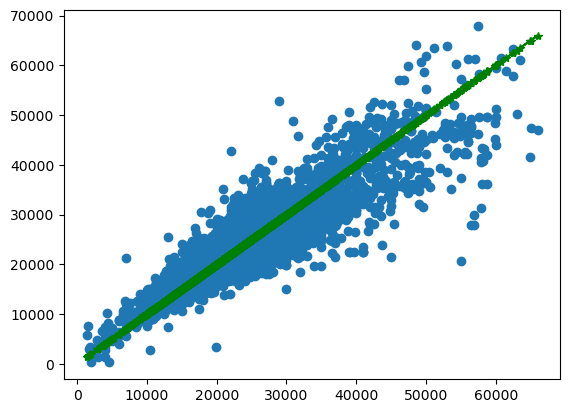

In [66]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [67]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [68]:
yeniArabaSeries = dataFrame.drop("price",axis=1).iloc[2]

In [69]:
type(yeniArabaSeries)


pandas.core.series.Series

In [70]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

2 boyutlu yapmak icin reshape yapman gerek

In [71]:
model.predict(yeniArabaSeries)

1/1 [==============================] - 0s 16ms/step


array([[61854.133]], dtype=float32)

In [72]:
model.save("araba_modeli.h5")

C:\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


sonradanCagirilanModel= load_model("araba_modeli.h5")
sonradanCagirilanModel.predict(yeniArabaOzellikleri)